In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [3]:
df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [5]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [7]:
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [8]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [10]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna('Unknown', inplace=True)

Missing values after filling:

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


In [12]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [13]:
!pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 1.9 MB/s eta 0:00:07
   ---------------------------------------- 0.1/13.3 MB 1.8 MB/s eta 0:00:08
    --------------------------------------- 0.2/13.3 MB 1.8 MB/s eta 0:00:08
    --------------------------------------- 0.3/13.3 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.4/13.3 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.5/13.3 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.5/13.3 MB 1.6 MB/s eta 0:00:09
   - -------------------------------------- 0.6/13.3 MB 1.6 MB/s eta 0:00:08
   -- ------------------------------------- 0.7/13.3 MB 1.8 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/13.3 MB 1.8 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/13.3 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.2/13.3 MB 2.2 MB/s eta 0:00:06
   ---

In [14]:
from prophet import Prophet

In [15]:
monthly_sales = df.groupby(pd.Grouper(key='ORDERDATE', freq='M')).sum(numeric_only=True)['SALES'].reset_index()
monthly_sales.columns = ['ds', 'y']

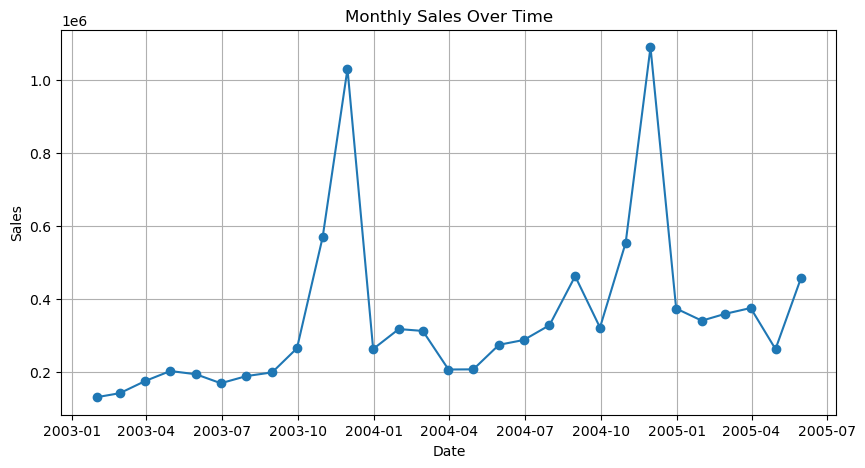

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['ds'], monthly_sales['y'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [17]:
model = Prophet()
model.fit(monthly_sales)

11:36:39 - cmdstanpy - INFO - Chain [1] start processing
11:36:40 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

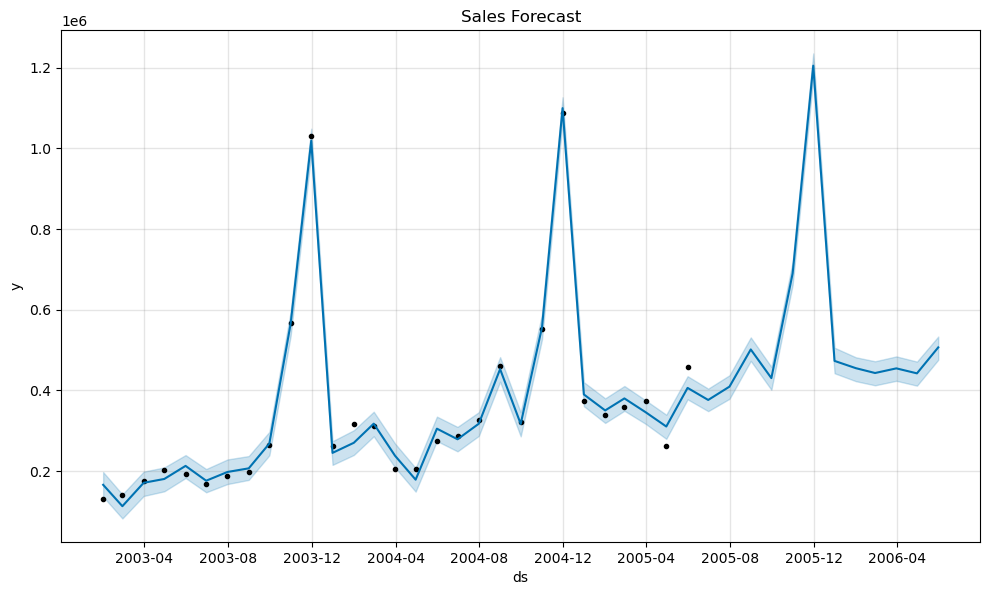

In [19]:
fig1 = model.plot(forecast)
plt.title("Sales Forecast")
plt.show()

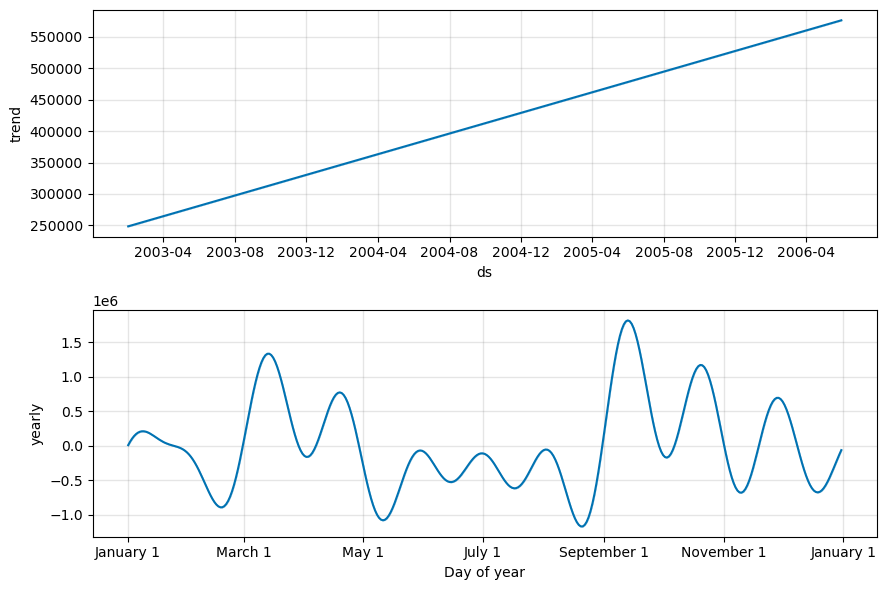

In [20]:
fig2 = model.plot_components(forecast)

In [21]:
train = monthly_sales[:-6]
test = monthly_sales[-6:]

In [22]:
# Retrain model on training data
model_eval = Prophet()
model_eval.fit(train)
future_eval = model_eval.make_future_dataframe(periods=6, freq='M')
forecast_eval = model_eval.predict(future_eval)

11:38:15 - cmdstanpy - INFO - Chain [1] start processing
11:38:15 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
# Compare predicted vs actual
predicted = forecast_eval[['ds', 'yhat']].set_index('ds').tail(6)
actual = test.set_index('ds')

In [24]:
# Forecast Accuracy
mae = mean_absolute_error(actual['y'], predicted['yhat'])
rmse = np.sqrt(mean_squared_error(actual['y'], predicted['yhat']))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 246870.24
RMSE: 254172.77


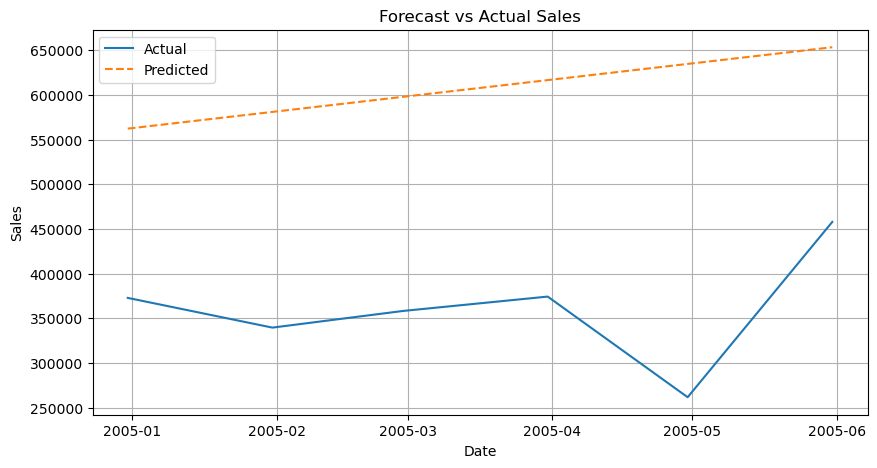

In [25]:
#Visualize Prediction Accuracy
plt.figure(figsize=(10,5))
plt.plot(actual.index, actual['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], label='Predicted', linestyle='--')
plt.title('Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\DCL\AppData\Local\Temp\ipykernel_1140\3614848655.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\DCL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


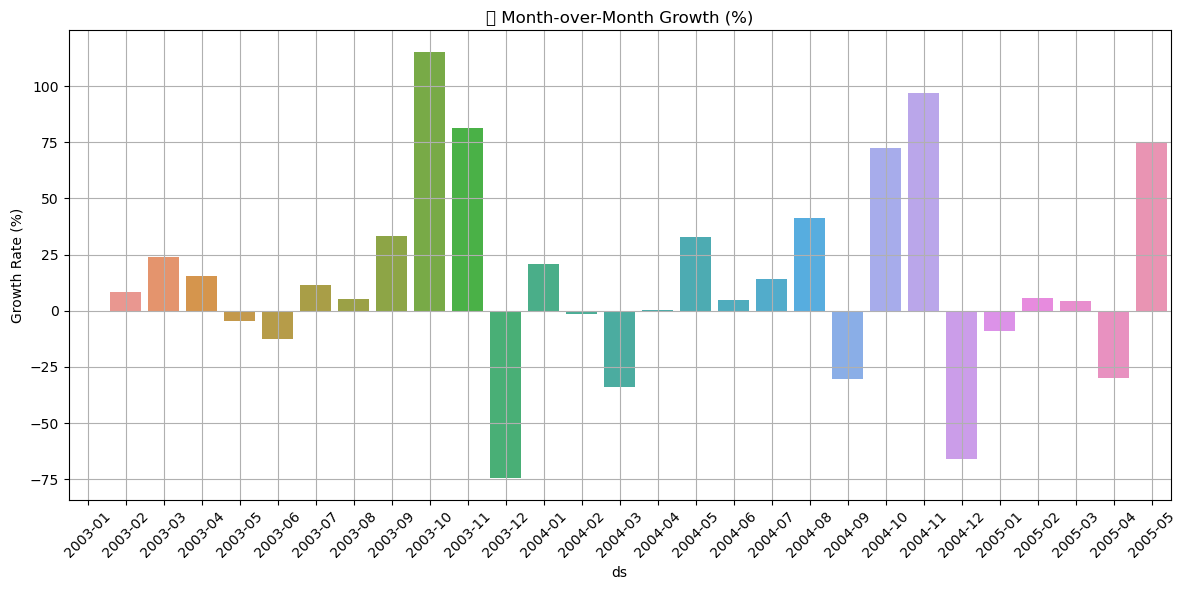

In [27]:
import seaborn as sns

monthly_sales['MoM_growth'] = monthly_sales['y'].pct_change() * 100

plt.figure(figsize=(12,6))
sns.barplot(x=monthly_sales['ds'].dt.strftime('%Y-%m'), y=monthly_sales['MoM_growth'])
plt.xticks(rotation=45)
plt.title("📊 Month-over-Month Growth (%)")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

# 📦 Import libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 📊 Prepare monthly sales data
monthly_sales = df.groupby(pd.Grouper(key='ORDERDATE', freq='M')).sum(numeric_only=True)['SALES'].reset_index()
monthly_sales.columns = ['Date', 'Sales']
monthly_sales['Month'] = np.arange(len(monthly_sales))  # Numeric index for regression

# 🔀 Train-test split
X = monthly_sales[['Month']]
y = monthly_sales['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6, shuffle=False)

# 🚀 Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 🔮 Predict on full data and future
monthly_sales['Predicted_Sales'] = lr_model.predict(X)

# 📈 Plot actual vs predicted sales
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], label='Actual Sales', marker='o')
plt.plot(monthly_sales['Date'], monthly_sales['Predicted_Sales'], label='Predicted Sales (LR)', linestyle='--', marker='x')
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# 📏 Evaluate model
y_pred_test = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Linear Regression MAE: {mae:.2f}")
print(f"Linear Regression RMSE: {rmse:.2f}")
